In [1]:
import pickle
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors
from types import SimpleNamespace


In [2]:
with open('_cm_listed_multivar.py','r') as f:
    lines = f.readlines()
lines = '\n'.join(lines)
lines = lines.replace('from .colors import ListedColormap', 'from matplotlib.colors import ListedColormap')

exec(lines)

_cm_listed_multivar = SimpleNamespace()
_cm_listed_multivar.cmaps = cmaps

for n in range(9):
    for typ in ['Add', 'Sub']:
        for var in ['A','B','C','D']:
            s = ''
            for key in _cm_listed_multivar.cmaps.keys():
                if key[0] == str(n) and key[-2] == var and typ in key:
                    s += key + ' '
            if len(s)>0:
                print(s)

2VarAddA0 2VarAddA1 
2VarAddB0 2VarAddB1 
2VarSubA0 2VarSubA1 
2VarSubB0 2VarSubB1 
3VarAddA0 3VarAddA1 3VarAddA2 
3VarAddB0 3VarAddB1 3VarAddB2 
3VarAddC0 3VarAddC1 3VarAddC2 
3VarAddD0 3VarAddD1 3VarAddD2 
3VarSubA0 3VarSubA1 3VarSubA2 
3VarSubB0 3VarSubB1 3VarSubB2 
3VarSubC0 3VarSubC1 3VarSubC2 
3VarSubD0 3VarSubD1 3VarSubD2 
4VarAddA0 4VarAddA1 4VarAddA2 4VarAddA3 
4VarAddB0 4VarAddB1 4VarAddB2 4VarAddB3 
4VarAddC0 4VarAddC1 4VarAddC2 4VarAddC3 
4VarAddD0 4VarAddD1 4VarAddD2 4VarAddD3 
4VarSubA0 4VarSubA1 4VarSubA2 4VarSubA3 
4VarSubB0 4VarSubB1 4VarSubB2 4VarSubB3 
4VarSubC0 4VarSubC1 4VarSubC2 4VarSubC3 
4VarSubD0 4VarSubD1 4VarSubD2 4VarSubD3 
5VarAddA0 5VarAddA1 5VarAddA2 5VarAddA3 5VarAddA4 
5VarAddC0 5VarAddC1 5VarAddC2 5VarAddC3 5VarAddC4 
5VarSubA0 5VarSubA1 5VarSubA2 5VarSubA3 5VarSubA4 
5VarSubC0 5VarSubC1 5VarSubC2 5VarSubC3 5VarSubC4 
6VarAddA0 6VarAddA1 6VarAddA2 6VarAddA3 6VarAddA4 6VarAddA5 
6VarAddC0 6VarAddC1 6VarAddC2 6VarAddC3 6VarAddC4 6VarAddC5 
6VarSubA0 6Var

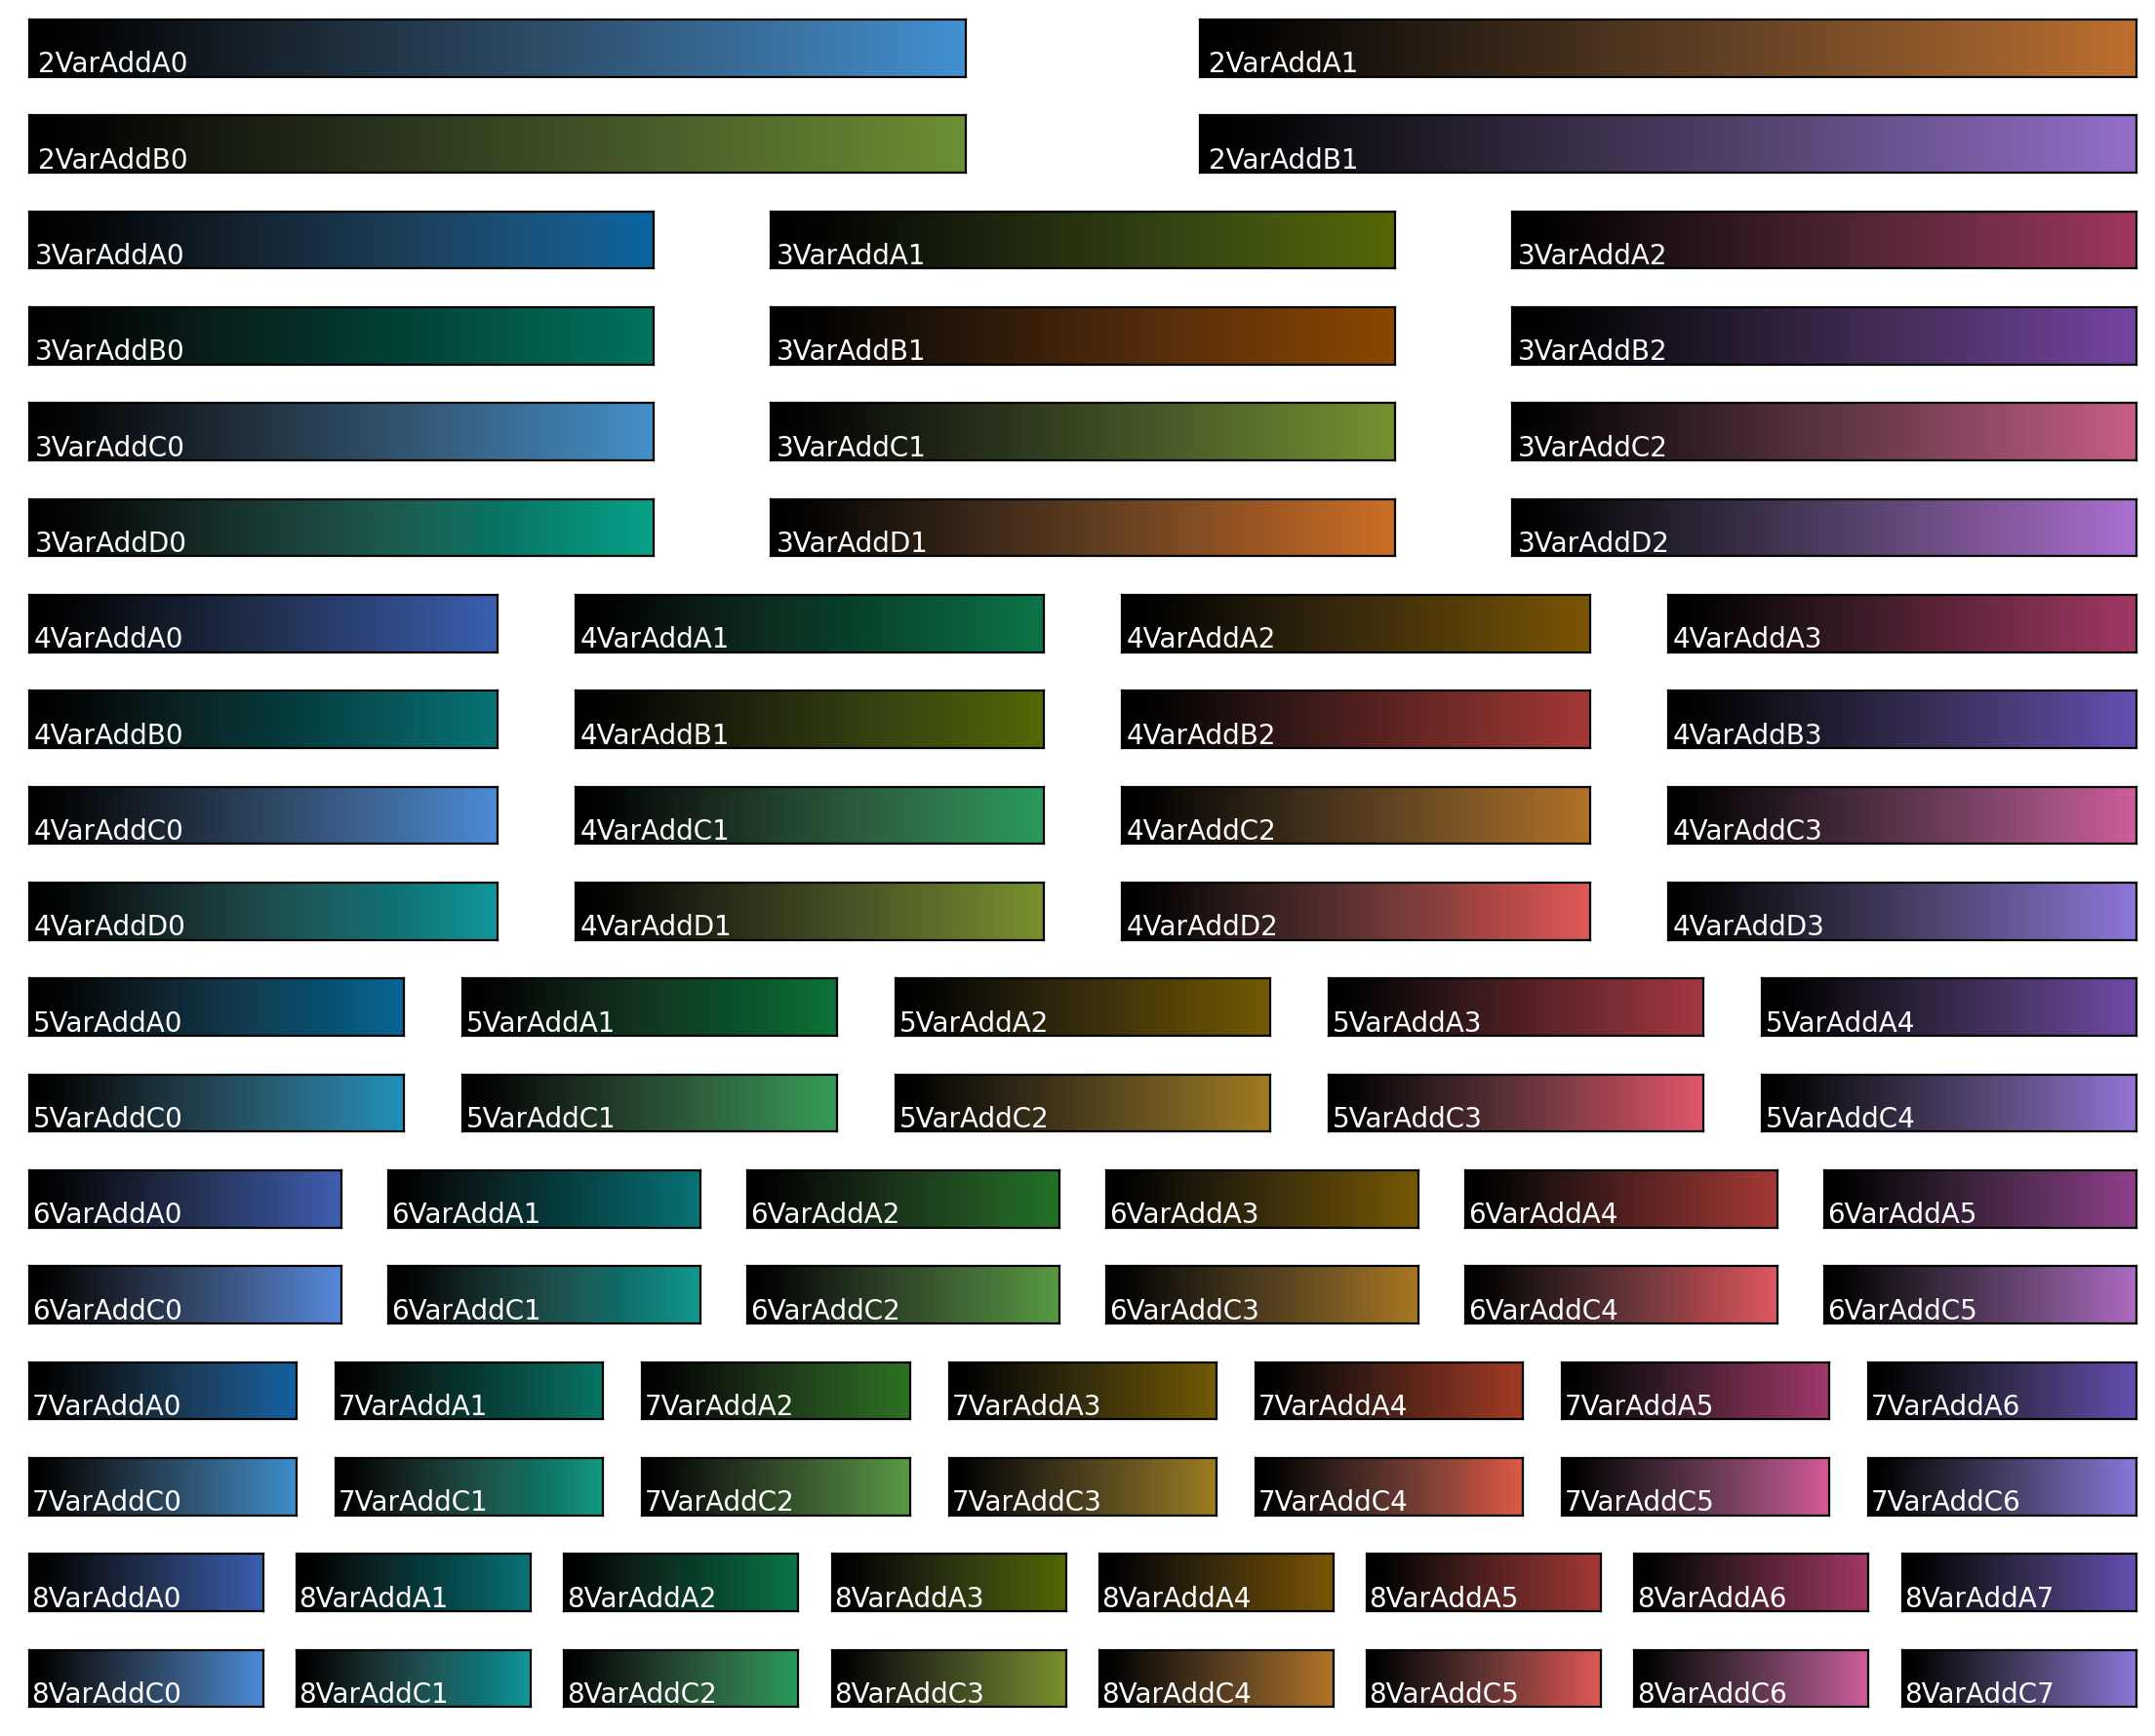

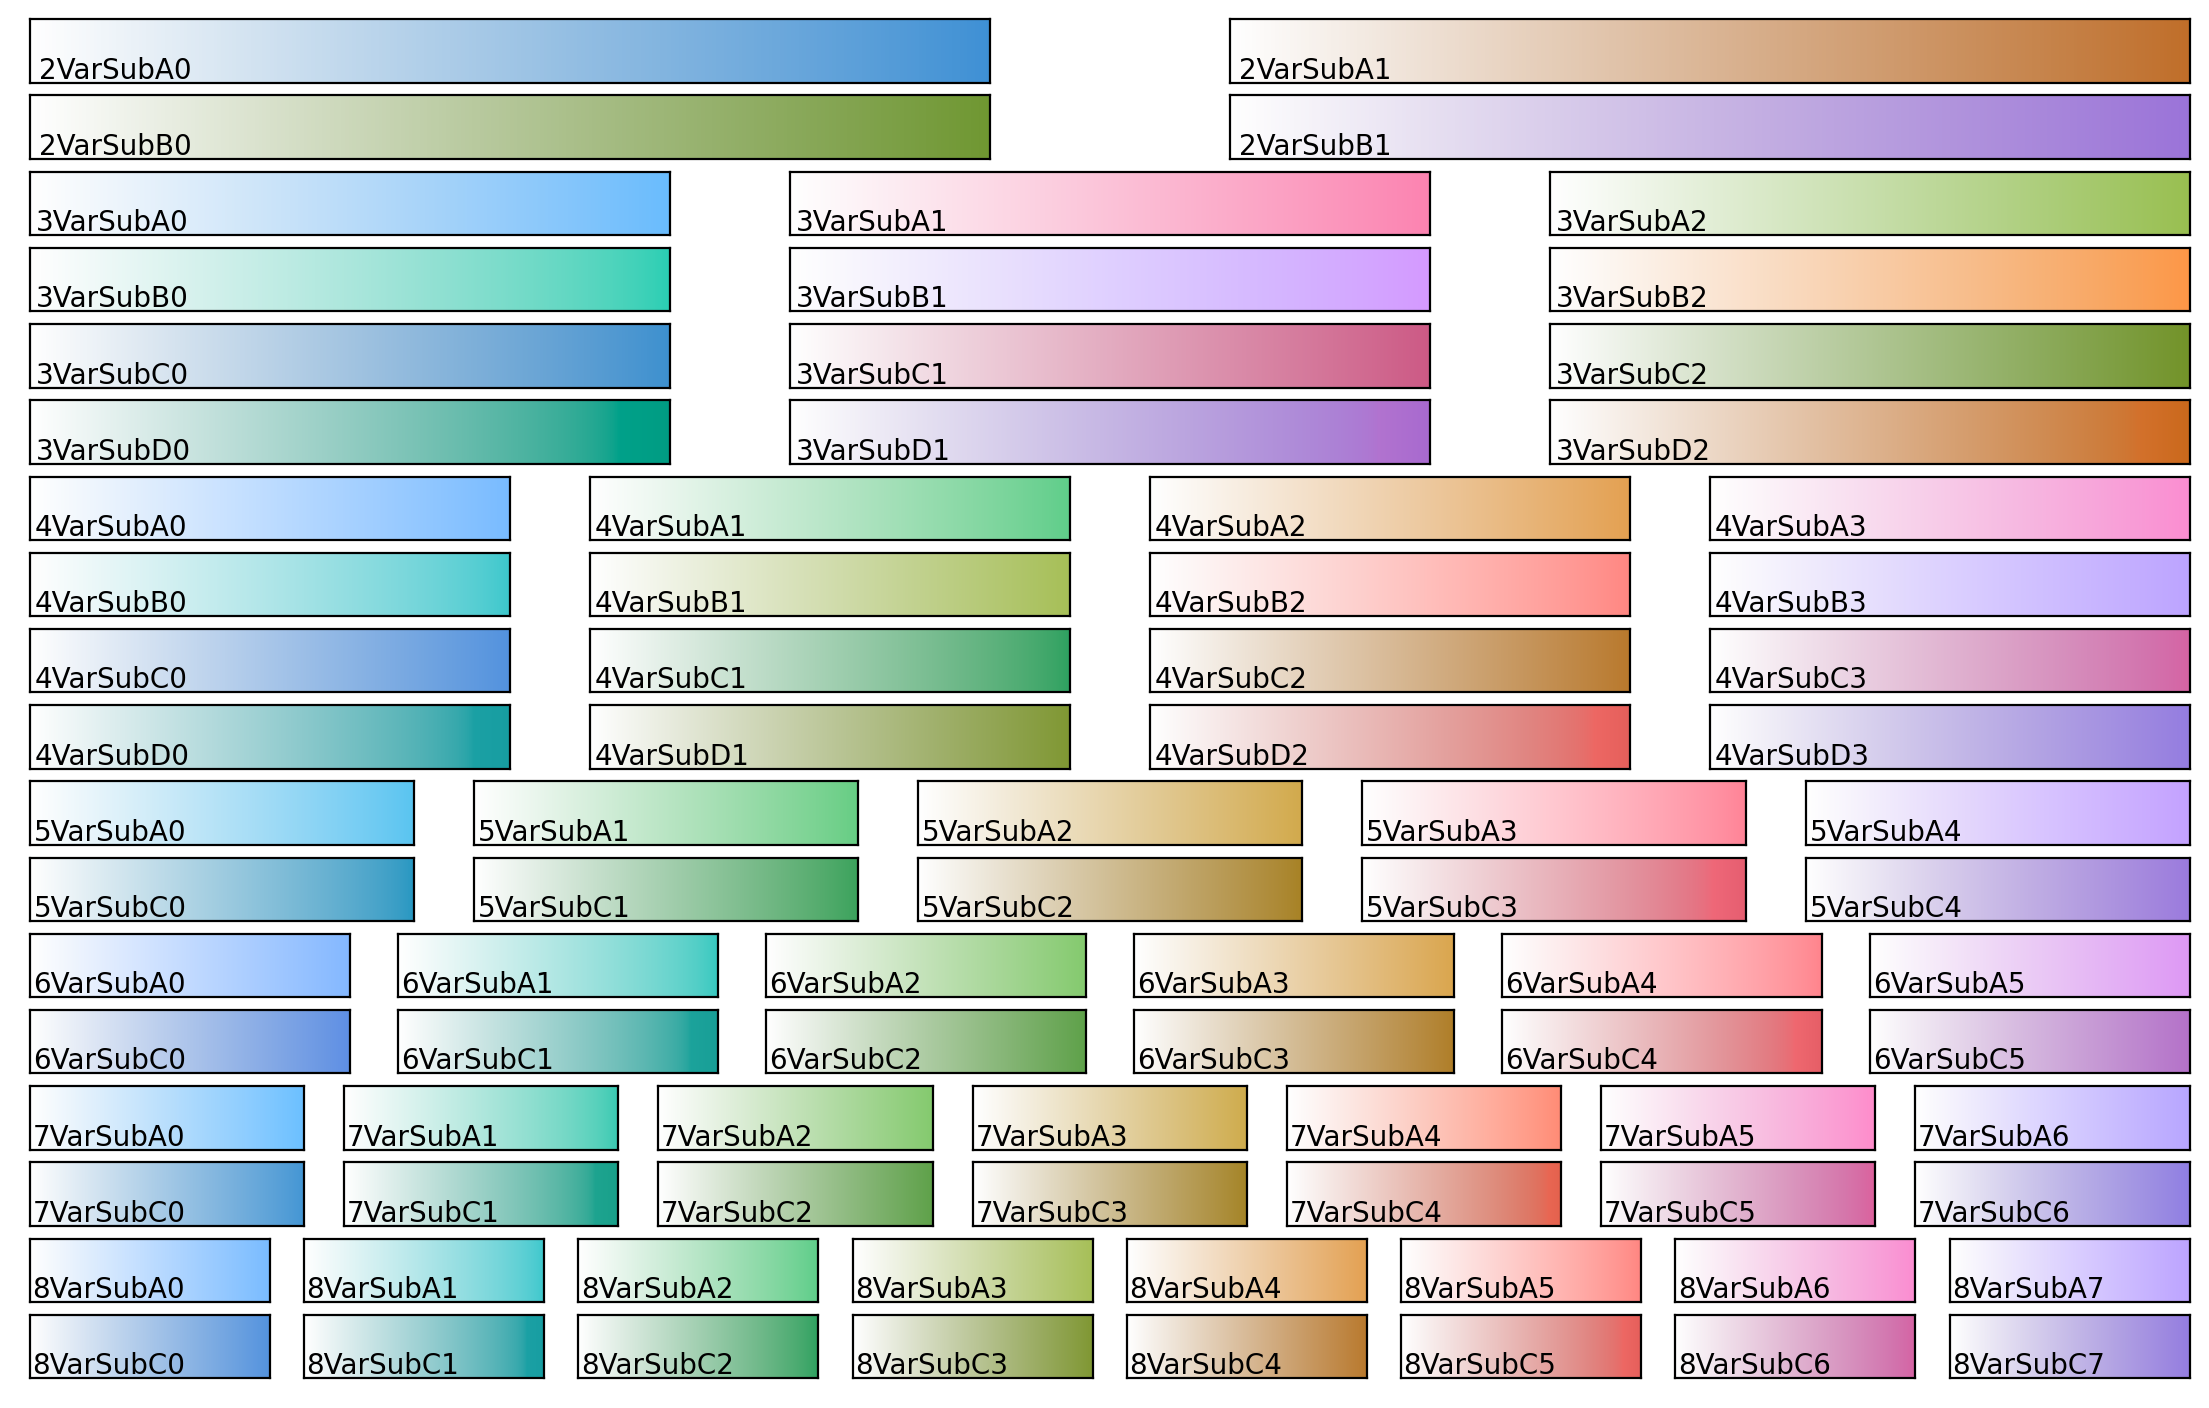

In [3]:
fig, axes = plt.subplots((7*4-10), 1, dpi = 200, figsize = (12,9), facecolor = 'w')
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
fig.tight_layout()
row = 0
versions = ['A', 'B', 'C', 'D']
for n in range(2, 9, 1):
    if n == 2:
        v = ['A','B']
    elif n > 4:
        v = ['A','C']
    else:
        v = versions
    for version in v:
        for typ in ['Add']: #, 'Sub']:
            name = f'{n}Var{typ}{version}'
            pos = axes[row].get_position()
            axes[row].remove()
            step = 0.8/n
            space = 0.1/(n-1)
            for i in range(n):
                #recttuple (left, bottom, width, height)
                recttuple = (0.05 + i*(step+space), pos.y0, step, pos.y1-pos.y0)
                ax = fig.add_axes(recttuple)
                ax.set_yticks([])
                ax.set_xticks([])
                cmap = _cm_listed_multivar.cmaps[name+str(i)].colors
                ax.imshow(cmap*np.ones((20,256,3)), aspect = 'auto')
                ax.text(2, 18, name+str(i), color = 'w')
            row += 1
fig.savefig('additive_cmaps.png')
            
fig, axes = plt.subplots((7*4-10), 1, dpi = 200, figsize = (12,9), facecolor = 'w')
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
row = 0
versions = ['A', 'B', 'C', 'D']
for n in range(2, 9, 1):
    if n == 2:
        v = ['A','B']
    elif n > 4:
        v = ['A','C']
    else:
        v = versions
    for version in v:
        for typ in ['Sub']: #, 'Sub']:
            name = f'{n}Var{typ}{version}'
            pos = axes[row].get_position()
            axes[row].remove()
            step = 0.8/n
            space = 0.1/(n-1)
            for i in range(n):
                #recttuple (left, bottom, width, height)
                recttuple = (0.05 + i*(step+space), pos.y0, step, pos.y1-pos.y0)
                ax = fig.add_axes(recttuple)
                ax.set_yticks([])
                ax.set_xticks([])
                cmap = _cm_listed_multivar.cmaps[name+str(i)].colors
                ax.imshow(cmap*np.ones((20,256,3)), aspect = 'auto')
                ax.text(2, 18, name+str(i), color = 'k')
            row += 1
fig.savefig('subtractive_cmaps.png')

# Evaluate

In [4]:
import os
import colorspacious
import colorstamps
cvd_d = {"name": "sRGB1+CVD",
    "cvd_type": "deuteranomaly",
    "severity": 100}
cvd_p = {"name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100}
cvd_t = {"name": "sRGB1+CVD",
    "cvd_type": "tritanomaly",
    "severity": 100}

Additive colormaps

In [11]:
for n in range(2, 9, 1):
    folder = f'comlormap_plots/{n}/'
    if not os.path.exists(folder):
        os.makedirs(folder)
    if n == 2:
        v = ['A','B']
    elif n < 5:
        v = versions
    else:
        v = ['A', 'C']
    for version in v:
        name = f'{n}VarAdd{version}'
        cmaps = [np.array(_cm_listed_multivar.cmaps[f'{name}{i}'].colors) for i in range(n)]
        # plot colorbars
        fig, axes = plt.subplots(4, n, figsize = (n*3, 3), dpi = 200, facecolor = 'w')
        axes = np.atleast_2d(axes)
        fig.suptitle(name)
        for i in range(n):
            axes[0,i].imshow(cmaps[i]*np.ones((40,256,3)))
            axes[0,i].set_title('full color visison')
            deuteranopia = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_d, "sRGB1")
            deuteranopia[deuteranopia<0] = 0
            deuteranopia[deuteranopia>1] = 1
            axes[1,i].imshow(deuteranopia)
            axes[1,i].set_title('deuteranopia')
            protanomaly = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_p, "sRGB1")
            protanomaly[protanomaly<0] = 0
            protanomaly[protanomaly>1] = 1
            axes[2,i].imshow(protanomaly)
            axes[2,i].set_title('protanomaly')
            tritanomaly = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_t, "sRGB1")
            tritanomaly[tritanomaly<0] = 0
            tritanomaly[tritanomaly>1] = 1
            axes[3,i].imshow(tritanomaly)
            axes[3,i].set_title('tritanomaly')
        for ax in axes.ravel():
            ax.set_xticks([])
            ax.set_yticks([])
        fig.tight_layout()
        fig.savefig(folder+name+'cmaps.png')
        plt.close(fig)
        
        # make all 2D cmaps
        fig, axes = plt.subplots(n*(n-1)//2,5, figsize = (12,3*n*(n-1)//2), dpi = 100, facecolor = 'w')
        axes = np.atleast_2d(axes)
        k = 0
        for i in range(n):
            for j in range(i+1,n):
                cmap = cmaps[i][:,np.newaxis]+ cmaps[j][np.newaxis,:]
                cmap[cmap<0] = 0
                cmap[cmap>1] = 1
                colorstamps.Stamp(cmap[:,:]*(1-2e-5) + 1e-5).eval(axes[k]) # include a delta (+1e-5) to avoid error
                axes[k,0].set_title(f'{i} vs {j}')
                k += 1
        fig.tight_layout()
        fig.savefig(folder+name+'compare.png')
        print(folder+name+'compare.png', end = '\r')
        plt.close(fig)

subtractive colormaps

In [12]:
for n in range(2, 9, 1):
    folder = f'comlormap_plots/{n}/'
    if not os.path.exists(folder):
        os.makedirs(folder)
    if n == 2:
        v = ['A','B']
    elif n < 5:
        v = versions
    else:
        v = ['A', 'C']
    for version in v:
        name = f'{n}VarSub{version}'
        cmaps = [np.array(_cm_listed_multivar.cmaps[f'{name}{i}'].colors) for i in range(n)]
        # plot colorbars
        fig, axes = plt.subplots(4, n, figsize = (n*3, 3), dpi = 200, facecolor = 'w')
        axes = np.atleast_2d(axes)
        fig.suptitle(name)
        for i in range(n):
            axes[0,i].imshow(cmaps[i]*np.ones((40,256,3)))
            axes[0,i].set_title('full color visison')
            deuteranopia = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_d, "sRGB1")
            deuteranopia[deuteranopia<0] = 0
            deuteranopia[deuteranopia>1] = 1
            axes[1,i].imshow(deuteranopia)
            axes[1,i].set_title('deuteranopia')
            protanomaly = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_p, "sRGB1")
            protanomaly[protanomaly<0] = 0
            protanomaly[protanomaly>1] = 1
            axes[2,i].imshow(protanomaly)
            axes[2,i].set_title('protanomaly')
            tritanomaly = colorspacious.cspace_convert(cmaps[i]*np.ones((40,256,3)), cvd_t, "sRGB1")
            tritanomaly[tritanomaly<0] = 0
            tritanomaly[tritanomaly>1] = 1
            axes[3,i].imshow(tritanomaly)
            axes[3,i].set_title('tritanomaly')
        for ax in axes.ravel():
            ax.set_xticks([])
            ax.set_yticks([])
        fig.tight_layout()
        fig.savefig(folder+name+'cmaps.png')
        plt.close(fig)
        
        # make all 2D cmaps
        fig, axes = plt.subplots(n*(n-1)//2,5, figsize = (12,3*n*(n-1)//2), dpi = 100, facecolor = 'w')
        axes = np.atleast_2d(axes)
        k = 0
        for i in range(n):
            for j in range(i+1,n):
                cmap = 1 -(1 -cmaps[i][:,np.newaxis]) -(1 -cmaps[j][np.newaxis,:])
                cmap[cmap<0] = 0
                cmap[cmap>1] = 1
                colorstamps.Stamp(cmap[:,:]*(1-2e-5) + 1e-5).eval(axes[k]) # include a delta (+1e-5) to avoid error
                axes[k,0].set_title(f'{i} vs {j}')
                k += 1
        fig.tight_layout()
        print(folder+name+'compare.png', end = '\r')
        plt.close(fig)